# Reeb Graph Matching
#### Implementing 'Topology Matching for Fully Automatic Similarity Estimation of 3D Shapes'
#### http://graphics.stanford.edu/courses/cs468-08-fall/pdf/Hilaga01.pdf
#### (Hilaga et al., 2001)

In [49]:
import numpy as np
import os
from os.path import isfile, join
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csd_functions
import scipy
import networkx as nx
import reeb_matching
sns.set()


Load tree data

In [50]:
prefix = 'input_strength032320'
node_points, node_connectivity, node_color = csd_functions.load_tree(prefix)

Compute multiresoluion reeb graph

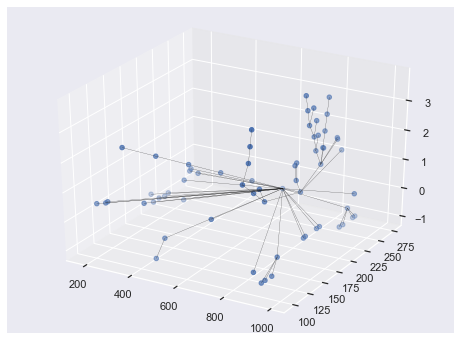

In [51]:
G = nx.Graph()
G.add_edges_from(node_connectivity)

node_attributes = {node_id : {'Position' : node_points[node_id,:], 'Visited' : 0, 'Merged':[],'Inserted':[],'New_Merge':[]} for node_id in list(G.nodes)}
nx.set_node_attributes(G,node_attributes)

interval_dict = reeb_matching.compute_intervals(node_points, 10)
reeb_matching.graph_search(G, 592, interval_dict,0)
reeb_matching.plot_graph(G)

G.clear()

Build attribute dictionary for MRG

In [52]:
def MRG_attributes(A, resolution_list):
    #Compute MRG at highest resolution
    original_node_list = list(A.nodes)
    node_points = np.array([A.nodes[node_idx]['Position'] for node_idx in original_node_list])
    
    interval_dict = reeb_matching.compute_intervals(node_points, resolution_list[0])
    reeb_matching.graph_search(A, original_node_list[0], interval_dict,0)

    #Store current nodes here
    node_list = list(A.nodes)

    reeb_matching.MRG_clear_visits(A,1)


    attribute_dict = {node_idx: {'Node_Count': 1, 'Merge_List': {}} for node_idx in node_list}

    #Compute MRG at subsequent lower resolutions, update attribute dictionary accordingly
    for res in resolution_list[1:]:
        node_points = np.array([A.nodes[node_idx]['Position'] for node_idx in node_list])
        interval_dict = reeb_matching.compute_intervals(node_points, res)
        reeb_matching.graph_search(A, node_list[0], interval_dict,0)

        #Update attribute dictionary
        node_list = list(A.nodes)

        temp_dict = {node_idx: {'Node_Count': 1+np.sum([attribute_dict[inner_node]['Node_Count'] for inner_node in list(A.nodes[node_idx]['New_Merge'])]), 'Merge_List': {inner_node: attribute_dict[inner_node] for inner_node in list(A.nodes[node_idx]['New_Merge']) }} for node_idx in node_list}

        
        attribute_dict = temp_dict.copy()

        temp_dict.clear()
        reeb_matching.MRG_clear_visits(A,0)

    return attribute_dict
        

In [53]:
#Load tree into graph
G = nx.Graph()
G.add_edges_from(node_connectivity)

node_attributes = {node_id : {'Position' : node_points[node_id,:], 'Visited' : 0, 'Merged':[],'Inserted':[], 'New_Merge':[]} for node_id in list(G.nodes)}
nx.set_node_attributes(G,node_attributes)


resolution_list = [16,8,4,2]
att_dict = MRG_attributes(G, resolution_list)





In [54]:
print(att_dict)


{0: {'Node_Count': 23.0, 'Merge_List': {1334: {'Node_Count': 1.0, 'Merge_List': {}}, 1335: {'Node_Count': 1.0, 'Merge_List': {}}, 1339: {'Node_Count': 1.0, 'Merge_List': {}}, 1340: {'Node_Count': 1.0, 'Merge_List': {}}, 1341: {'Node_Count': 1.0, 'Merge_List': {}}, 1342: {'Node_Count': 1.0, 'Merge_List': {}}, 1343: {'Node_Count': 3, 'Merge_List': {1345: {'Node_Count': 2, 'Merge_List': {1346: {'Node_Count': 1, 'Merge_List': {}}}}}}, 1351: {'Node_Count': 1.0, 'Merge_List': {}}, 1352: {'Node_Count': 1.0, 'Merge_List': {}}, 1353: {'Node_Count': 1.0, 'Merge_List': {}}, 1354: {'Node_Count': 1.0, 'Merge_List': {}}, 1355: {'Node_Count': 9, 'Merge_List': {1356: {'Node_Count': 2, 'Merge_List': {553: {'Node_Count': 1, 'Merge_List': {}}}}, 1362: {'Node_Count': 2, 'Merge_List': {548: {'Node_Count': 1, 'Merge_List': {}}}}, 1363: {'Node_Count': 2, 'Merge_List': {1247: {'Node_Count': 1, 'Merge_List': {}}}}, 1364: {'Node_Count': 2, 'Merge_List': {1286: {'Node_Count': 1, 'Merge_List': {}}}}}}}}, 560: {'N

In [56]:
# print(att_dict[0]['Merge_List'])
print(att_dict[0]['Node_Count'])

count_list= []
for idx in att_dict[0]['Merge_List'].keys():
    # print(idx)
    count_list.append(att_dict[0]['Merge_List'][idx]['Node_Count'])

np.sum(count_list)

23.0


22.0